In [3]:
import numpy as np
import cv2
import pandas as pd
import os
import pickle
from google.colab.patches import cv2_imshow

# Face Detection Model
- Load the models

In [4]:
face_detection_model = './models/res10_300x300_ssd_iter_140000.caffemodel'
face_detection_proto = './models/deploy.prototxt.txt'
face_descriptor = './models/openface.nn4.small2.v1.t7'
# load models using cv2 dnn
detector_model = cv2.dnn.readNetFromCaffe(face_detection_proto,face_detection_model)
descriptor_model = cv2.dnn.readNetFromTorch(face_descriptor)

In [5]:
!ls emotion_data

angry  disgust	fear  happy  neutral  sad  surprise


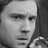

In [7]:
# consider sample image
img = cv2.imread('./emotion_data/angry/0.jpg')
cv2_imshow(img)

In [8]:
def helper(image_path):
    img = cv2.imread(image_path)
    # step-1: face detection
    image = img.copy()
    h,w = image.shape[:2]
    img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False,crop=False)
    # set the input
    detector_model.setInput(img_blob)
    detections = detector_model.forward()

    if len(detections) > 0:
        i = np.argmax(detections[0,0,:,2])# consider the face with max confidence score
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startx,starty,endx,endy) = box.astype('int')
            # step-2: Feature Extraction or Embedding
            roi = image[starty:endy,startx:endx].copy()
            # get the face descriptors
            faceblob = cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),swapRB=True,crop=True)
            descriptor_model.setInput(faceblob)
            vectors = descriptor_model.forward()
            
            return vectors
    return None


Apply helper function to all images and get face descriptors

In [9]:
data = dict(data=[],label=[])

In [10]:
folders = os.listdir('emotion_data')
for folder in folders:
    filenames = os.listdir('emotion_data/{}'.format(folder))
    for filename in filenames:
        try:
            vector = helper('./emotion_data/{}/{}'.format(folder,filename))
            if vector is not None:
                data['data'].append(vector)
                data['label'].append(folder)
                print('Feature Extracted Sucessfully')
        except:
            pass

Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Extracted Sucessfully
Feature Ex

In [11]:
data.keys()

dict_keys(['data', 'label'])

In [12]:
pd.Series(data['label']).value_counts()

neutral     292
sad         260
happy       244
fear        207
angry       189
surprise    181
disgust      40
dtype: int64

In [13]:
# save the data
pickle.dump(data,open('data_face_features_emotion.pickle',mode='wb'))